In [1]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.animation as animation

## Thermal diffusivity

Vectorized implementation of solver_BE_simple using also
    a sparse (tridiagonal) matrix for efficiency.

$$  \frac{\partial u}{\partial t} = \alpha  \frac{\partial^2 u}{\partial x^2} $$

In [53]:
#Physical parameters
#Thermal diffusivity constant
#copper
#a = 1.11e-4  # (m²/s)
# Iron
#a = 2.3e-5
# Brass (70% Cu 30% Zn)
#a = 3.412e-5
# Brass, Red (85% Cu 9% Sn 6% Zn)
#a = 1.804e-5
# Aliminium ALLOY 2024
a = 7.3e-5

L = 1.0 # bar length
Period = 300  # Heat time period in seconds 
T = 3000.0 # Simulation time

qsi = np.sqrt(np.pi/Period/a)
xInv = 3.0*np.pi/4.0/qsi
print("Temp Inversion at x= %5.3f m" %(xInv) )
print("Attenuation at xInv= %5.2f%%" %(100.0*np.exp(-3.0*np.pi/4.0)) )
print("Attenuation at L= %8.6f%%" %(100.0*np.exp(-L *qsi)) )

Temp Inversion at x= 0.197 m
Attenuation at xInv=  9.48%
Attenuation at L= 0.000629%


In [49]:
# Initial condition
def I(x):
    val = np.zeros(len(x))
    val[:5] = 1.0
    return val #np.sin(x)

def Is(x):
    val = np.zeros(len(x))
    return val 

Nx = 100 # num spatial points 
#      The dimensionless number a*dt/dx**2, which implicitly
#      specifies the time step.
F = 2
x = np.linspace(0, L, Nx+1)   # mesh points in space
dx = x[1] - x[0]

dt = F*dx**2/a # time step
Nt = int(round(T/float(dt)))
t = np.linspace(0, T, Nt+1)   # mesh points in time

u   = np.zeros(Nx+1)   # solution array at t[n+1]
u_1 = np.zeros(Nx+1)   # solution at t[n]

# Representation of sparse matrix and right-hand side
diagonal = np.zeros(Nx+1)
lower    = np.zeros(Nx)
upper    = np.zeros(Nx)
b        = np.zeros(Nx+1)

# Precompute sparse matrix
diagonal[:] = 1 + 2*F
lower[:] = -F  #1
upper[:] = -F  #1
# Insert boundary conditions
diagonal[0] = 1
upper[0] = 0
diagonal[Nx] = 1
lower[-1] = 0
print("Nt=%g" %Nt)


Nt=1095


In [50]:
A = sparse.diags(
    diagonals=[diagonal, lower, upper],
    offsets=[0, -1, 1], shape=(Nx+1, Nx+1), format='csr')
#print(A.todense())

# Set initial condition
#for i in range(0,Nx+1):
u_1 = I(x)

a = np.zeros((Nt+1,Nx+1))
for n in range(0, Nt):
    b = u_1
    b[0] = np.sin(2*np.pi*t[n]/Period) # 1.0   # boundary conditions
    b[-1] = 0.0  # boundary conditions
    u[:] = spsolve(A, b)
    a[n] = u
    #u_1[:] = u
    u_1, u = u, u_1


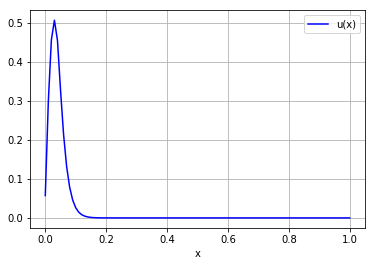

iter=1, time =2.73973 s


In [51]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)   #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
it = 1
ax.plot(x, a[it], 'b', label='u(x)')
#ax.plot(t, sol[:, 1], 'g', label='omega(t)')
ax.legend(loc='best')
ax.set_xlabel('x')
ax.grid()
plt.show()
print("iter=%g, time =%g s" %(it, t[it]))

<IPython.core.display.Javascript object>


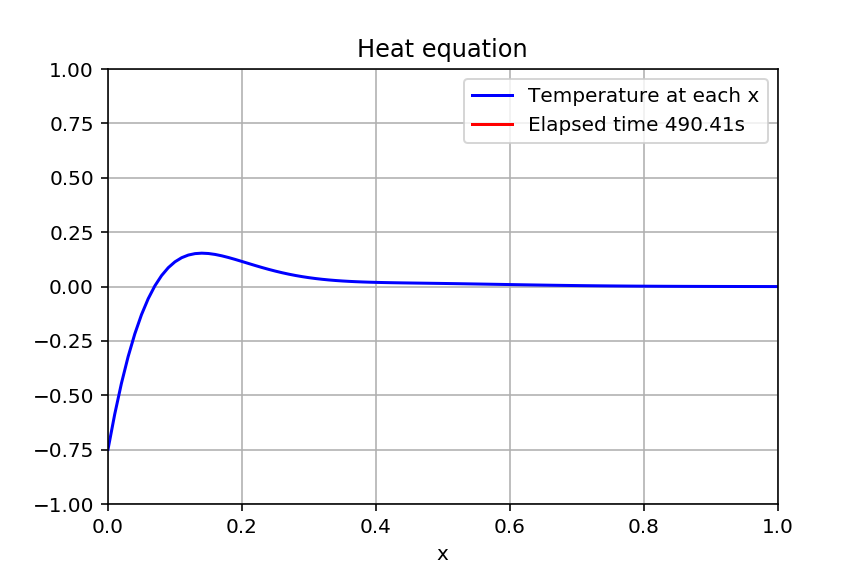

In [52]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111) #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
ax.grid()

ax.clear()
lineT, = plt.plot(x,a[0],color='b',label='Temperature at each x')
lineText, = plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[0],2)) + 's')
plt.grid(True)
#plt.ylim([temp0-2,2.5*scale])
plt.xlim([0,L])
plt.ylim([-1,1])
plt.title('Heat equation')
ax.set_xlabel('x')
#plt.legend()


def animate(i):
#    ui = a[i]            #The ends of the rod are kept at temperature temp0
    lineT.set_ydata(a[i])
    lineText.set_label('Elapsed time '+str(round(t[i],2)) + 's')
    plt.legend()

    
ani = animation.FuncAnimation(fig, animate, np.arange(Nt), interval=25 )   #, blit=True, init_func=init)

#ani.save('HeatDifusionBE.mp4', fps=15)
plt.show()

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111) #, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
ax.grid()

def animate(i):
    ui = a[i]            #The ends of the rod are kept at temperature temp0
    ax.clear()
    plt.plot(x,a[i],color='red',label='Temperature at each x')
    plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[i],2)) + 's')
    plt.grid(True)
    #plt.ylim([temp0-2,2.5*scale])
    plt.xlim([0,L])
    plt.ylim([-1,1])
    plt.title('Heat equation')
    plt.legend()
    
ani = animation.FuncAnimation(fig, animate, np.arange(Nt), interval=25 )   #, blit=True, init_func=init)

# ani.save('simple_pendulum.mp4', fps=15)
plt.show()

# References
http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html

[Material Properties](https://en.wikipedia.org/wiki/Thermal_diffusivity)



"A Heat Transfer Textbook", John H. Lienhard, Chp. 5.6 Transient heat conduction to a semi-infinite region, pg. 220